In [1]:
# Dataset - https://www.kaggle.com/datasets/salader/dogs-vs-cats

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [3]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:10<00:00, 49.4MB/s]
100% 1.06G/1.06G [00:10<00:00, 107MB/s] 


In [4]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [5]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [7]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/dogs_vs_cats/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/dogs_vs_cats/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [8]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [9]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [11]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [12]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 76s 103ms/step - loss: 1.5533 - accuracy: 0.5839 - val_loss: 0.7183 - val_accuracy: 0.6186
Epoch 2/10
625/625 [==============================] - 67s 106ms/step - loss: 0.6069 - accuracy: 0.6781 - val_loss: 0.5206 - val_accuracy: 0.7468
Epoch 3/10
625/625 [==============================] - 66s 105ms/step - loss: 0.4956 - accuracy: 0.7602 - val_loss: 0.5293 - val_accuracy: 0.7422
Epoch 4/10
625/625 [==============================] - 63s 100ms/step - loss: 0.4284 - accuracy: 0.8023 - val_loss: 0.6072 - val_accuracy: 0.7140
Epoch 5/10
625/625 [==============================] - 63s 100ms/step - loss: 0.3813 - accuracy: 0.8306 - val_loss: 0.5290 - val_accuracy: 0.7440
Epoch 6/10
625/625 [==============================] - 66s 105ms/step - loss: 0.3206 - accuracy: 0.8602 - val_loss: 0.5003 - val_accuracy: 0.7788
Epoch 7/10
625/625 [==============================] - 64s 101ms/step - loss: 0.2501 - accuracy: 0.8946 - val_loss: 0.5596 - val_ac

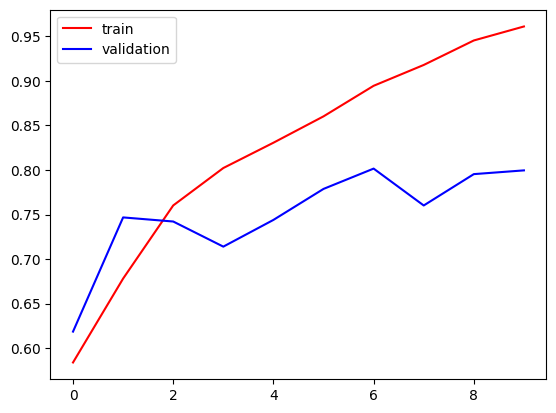

In [13]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

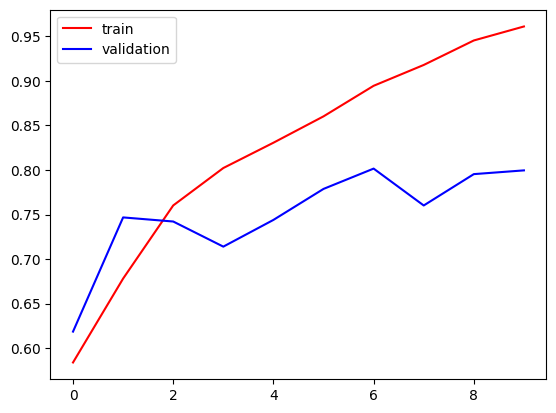

In [14]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

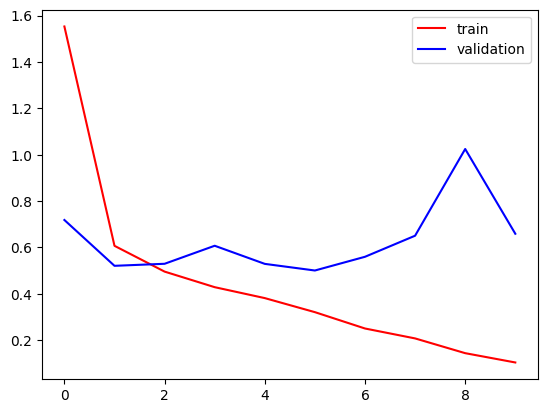

In [15]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

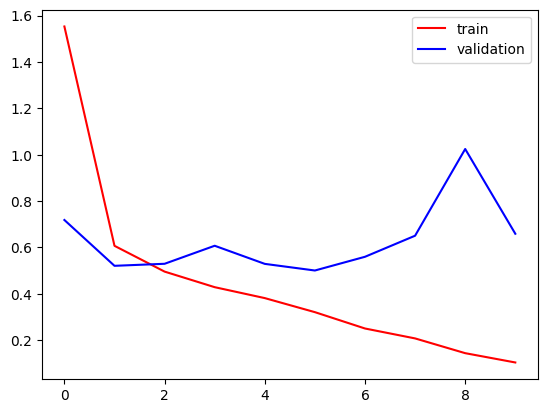

In [16]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [17]:
# ways to reduce overfitting

# Add more data
# Data Augmentation -> next video
# L1/L2 Regularizer
# Dropout
# Batch Norm
# Reduce complexity

In [18]:
import cv2

In [21]:
test_img = cv2.imread('/content/dogs_vs_cats/test/cats/cat.10000.jpg')

Reading an image

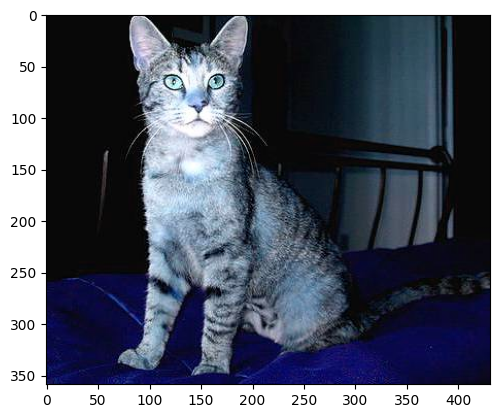

In [22]:
plt.imshow(test_img)

In [23]:
test_img.shape

(359, 431, 3)

In [24]:
test_img = cv2.resize(test_img,(256,256))

In [25]:
test_input = test_img.reshape((1,256,256,3))

In [26]:
model.predict(test_input)

1/1 [==============================] - 0s 409ms/step


array([[0.]], dtype=float32)

Image With name

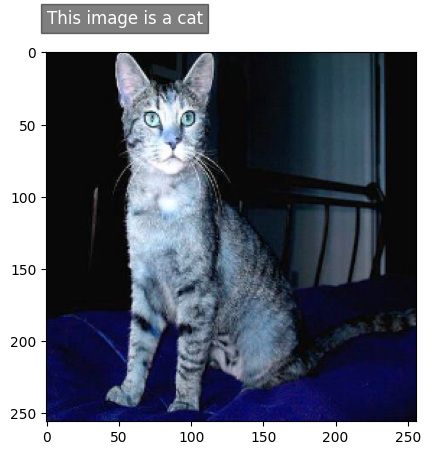

In [27]:
import matplotlib.pyplot as plt

# Assuming test_img is your image data
plt.imshow(test_img)
plt.text(0, -20, 'This image is a cat', color='white', fontsize=12, bbox=dict(facecolor='black', alpha=0.5))
plt.show()


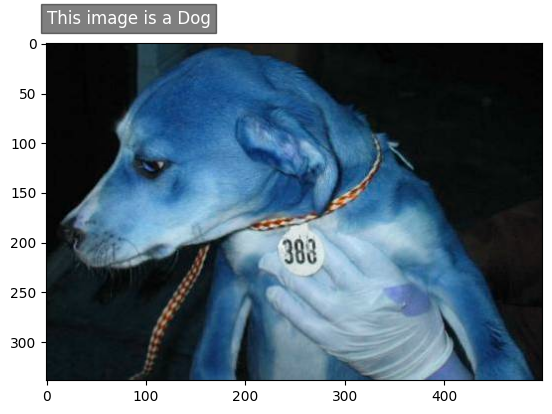

In [28]:
import matplotlib.pyplot as plt
test_img = cv2.imread('/content/dogs_vs_cats/test/dogs/dog.10006.jpg')
# Assuming test_img is your image data
plt.imshow(test_img)
plt.text(0, -20, 'This image is a Dog', color='white', fontsize=12, bbox=dict(facecolor='black', alpha=0.5))
plt.show()

In [31]:
!pip install flask flask-ngrok


In [3]:
from IPython.display import display
import ipywidgets as widgets
from PIL import Image
import io

def classify_image(image_path):
    # Here you would perform your classification logic.
    # For this example, let's just check if the image filename contains 'cat' or 'dog'.
    if 'cat' in image_path:
        return 'Cat'
    elif 'dog' in image_path:
        return 'Dog'
    else:
        return 'Unknown'

def on_upload(change):
    with output:
        output.clear_output()
        uploaded_filename = next(iter(upload.value))
        content = upload.value[uploaded_filename]['content']
        img = Image.open(io.BytesIO(content))
        display(img)
        image_path = uploaded_filename
        result = classify_image(image_path)
        print("Uploaded Image: ", image_path)
        print("Classified as: ", result)

upload = widgets.FileUpload(accept='image/*')
upload.observe(on_upload, names='_counter')

output = widgets.Output()

display(widgets.VBox([upload, output]))


In [2]:
pip install ipywidgets

                                              0.0/139.4 kB ? eta -:--:--
     --------                                30.7/139.4 kB 1.3 MB/s eta 0:00:01
     ----------                            41.0/139.4 kB 393.8 kB/s eta 0:00:01
     ------------------------              92.2/139.4 kB 744.7 kB/s eta 0:00:01
     -------------------------------      122.9/139.4 kB 654.9 kB/s eta 0:00:01
     ----------------------------------   133.1/139.4 kB 714.4 kB/s eta 0:00:01
     ------------------------------------ 139.4/139.4 kB 589.8 kB/s eta 0:00:00
                                              0.0/2.3 MB ? eta -:--:--
     --                                       0.1/2.3 MB 3.5 MB/s eta 0:00:01
     --                                       0.1/2.3 MB 1.7 MB/s eta 0:00:02
     ----                                     0.3/2.3 MB 2.2 MB/s eta 0:00:01
     -------                                  0.4/2.3 MB 2.6 MB/s eta 0:00:01
     ----------                               0.6/2.3 MB 2.6 MB/


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
from IPython.display import display
import ipywidgets as widgets
from PIL import Image
import io

def classify_image(image_path):
    # Here you would perform your classification logic.
    # For this example, let's just check if the image filename contains 'cat' or 'dog'.
    if 'cat' in image_path:
        return 'Cat'
    elif 'dog' in image_path:
        return 'Dog'
    else:
        return 'Unknown'

def on_upload(change):
    with output:
        output.clear_output()
        uploaded_filename = next(iter(upload.value))
        content = upload.value[uploaded_filename]['content']
        img = Image.open(io.BytesIO(content))
        display(img)
        image_path = uploaded_filename
        result = classify_image(image_path)
        print("Uploaded Image: ", image_path)
        print("Classified as: ", result)

upload = widgets.FileUpload(accept='image/*')
upload.observe(on_upload, names='_counter')

output = widgets.Output()

display(widgets.VBox([upload, output]))


uploaded image with edge detection

In [2]:
from IPython.display import display
import ipywidgets as widgets
import cv2
from PIL import Image
import numpy as np
import io

def classify_image(image_path):
    # Here you would perform your classification logic.
    # For this example, let's just check if the image filename contains 'cat' or 'dog'.
    if 'cat' in image_path:
        return 'Cat'
    elif 'dog' in image_path:
        return 'Dog'
    else:
        return 'Unknown'

def edge_detection(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, 100, 200)
    return edges

def on_upload(change):
    with output:
        output.clear_output()
        uploaded_filename = next(iter(upload.value))
        content = upload.value[uploaded_filename]['content']
        img = Image.open(io.BytesIO(content))

        # Convert PIL image to OpenCV format
        open_cv_image = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)

        # Edge detection
        edges = edge_detection(open_cv_image)
        edge_img = Image.fromarray(edges)

        # Display original and edge-detected images
        display(img)
        display(edge_img)

        image_path = uploaded_filename
        result = classify_image(image_path)
        print("Uploaded Image: ", image_path)
        print("Classified as: ", result)

upload = widgets.FileUpload(accept='image/*')
upload.observe(on_upload, names='_counter')

output = widgets.Output()

display(widgets.VBox([upload, output]))


In [4]:
from IPython.display import display
import ipywidgets as widgets
from PIL import Image
import io

def classify_image(image_path):
    # Here you would perform your classification logic.
    # For this example, let's just check if the image filename contains 'cat' or 'dog'.
    if 'cat' in image_path:
        return 'Cat'
    elif 'dog' in image_path:
        return 'Dog'
    else:
        return 'Unknown'

def on_upload(change):
    with output:
        output.clear_output()
        for uploaded_filename in upload.value:
            content = upload.value[uploaded_filename]['content']
            img = Image.open(io.BytesIO(content))
            display(img)
            image_path = uploaded_filename
            result = classify_image(image_path)
            print("Uploaded Image: ", image_path)
            print("Classified as: ", result)

upload = widgets.FileUpload(accept='image/*', multiple=True)
upload.observe(on_upload, names='_counter')

output = widgets.Output()

display(widgets.VBox([upload, output]))


In [7]:
from IPython.display import display, HTML
import ipywidgets as widgets
import cv2
from PIL import Image
import numpy as np
import io

def classify_image(image_path):
    # Here you would perform your classification logic.
    # For this example, let's just check if the image filename contains 'cat' or 'dog'.
    if 'cat' in image_path:
        return 'Cat'
    elif 'dog' in image_path:
        return 'Dog'
    else:
        return 'Unknown'

def edge_detection(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, 100, 200)
    return edges

def segmentation(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    return thresh

def contour_detection(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contour_img = cv2.drawContours(np.zeros_like(gray), contours, -1, (255, 255, 255), 1)
    return contour_img

def rgb_color(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

def on_upload(change):
    with output:
        output.clear_output()
        for uploaded_filename in upload.value:
            content = upload.value[uploaded_filename]['content']
            img = Image.open(io.BytesIO(content))
            img_array = np.array(img)

            # Edge detection
            edge_img = edge_detection(img_array)
            edge_img = Image.fromarray(edge_img)
            display(HTML("<h3>Edge Detection</h3>"))
            display(edge_img)

            # Segmentation
            seg_img = segmentation(img_array)
            seg_img = Image.fromarray(seg_img)
            display(HTML("<h3>Segmentation</h3>"))
            display(seg_img)

            # Otsu's thresholding and contour detection
            contour_img = contour_detection(img_array)
            contour_img = Image.fromarray(contour_img)
            display(HTML("<h3>Contour Detection</h3>"))
            display(contour_img)

            # RGB color display
            rgb_img = rgb_color(img_array)
            rgb_img = Image.fromarray(rgb_img)
            display(HTML("<h3>RGB Color</h3>"))
            display(rgb_img)

            image_path = uploaded_filename
            result = classify_image(image_path)
            print("Uploaded Image: ", image_path)
            print("Classified as: ", result)

upload = widgets.FileUpload(accept='image/*', multiple=True)
upload.observe(on_upload, names='_counter')

output = widgets.Output()

display(widgets.VBox([upload, output]))


In [6]:
from IPython.display import display, HTML
import ipywidgets as widgets
import cv2
from PIL import Image
import numpy as np
import io

def classify_image(image_path):
    # Here you would perform your classification logic.
    # For this example, let's just check if the image filename contains 'cat' or 'dog'.
    if 'cat' in image_path:
        return 'Cat'
    elif 'dog' in image_path:
        return 'Dog'
    else:
        return 'Unknown'

def edge_detection(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, 100, 200)
    return edges

def segmentation(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    return thresh

def contour_detection(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contour_img = cv2.drawContours(np.zeros_like(gray), contours, -1, (255, 255, 255), 1)
    return contour_img

def rgb_color(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

def on_upload(change):
    with output:
        output.clear_output()
        for uploaded_filename in upload.value:
            content = upload.value[uploaded_filename]['content']
            img = Image.open(io.BytesIO(content))
            img_array = np.array(img)

            # Edge detection
            edge_img = edge_detection(img_array)
            edge_img = Image.fromarray(edge_img)
            display(HTML("<h3>Edge Detection</h3>"))
            display(edge_img)

            # Segmentation
            seg_img = segmentation(img_array)
            seg_img = Image.fromarray(seg_img)
            display(HTML("<h3>Segmentation</h3>"))
            display(seg_img)

            # Otsu's thresholding and contour detection
            contour_img = contour_detection(img_array)
            contour_img = Image.fromarray(contour_img)
            display(HTML("<h3>Contour Detection</h3>"))
            display(contour_img)

            # RGB color display
            rgb_img = rgb_color(img_array)
            rgb_img = Image.fromarray(rgb_img)
            display(HTML("<h3>RGB Color</h3>"))
            display(rgb_img)

            image_path = uploaded_filename
            result = classify_image(image_path)
            print("Uploaded Image: ", image_path)
            print("Classified as: ", result)

upload = widgets.FileUpload(accept='image/*', multiple=True)
upload.observe(on_upload, names='_counter')

output = widgets.Output()

display(widgets.VBox([upload, output]))
